In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# importing libraries
import math
import pandas as pd
import numpy as np
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [77]:
train_path = '/content/drive/MyDrive/Hackathons/Cascade Cup/train.csv'
test_path = '/content/drive/MyDrive/Hackathons/Cascade Cup/test.csv'
sub_path = '/content/drive/MyDrive/Hackathons/Cascade Cup/test.csv'

In [78]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sub = pd.read_csv(sub_path)

print('Train Rows = ',train.shape[0])
print('Train Column = ',train.shape[1])

train.sample(5)

Train Rows =  450000
Train Column =  20


,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
56171,2021-01-27 14:25:09,535818,2021-01-27 00:00:00,2021-01-27 14:26:08,2021-01-27 14:26:20,2021-01-27 14:33:12,2021-01-27 14:57:44,1912,1.033600,4.82,233.0,231.0,0,2.0,542.0,NaN,NaN,NaN,49.850000,NaN
397974,2021-02-05 07:02:30,158921,2021-02-05 00:00:00,2021-02-05 07:02:31,2021-02-05 07:02:49,2021-02-05 07:13:32,2021-02-05 07:24:37,9276,1.502400,1.92,27.0,27.0,0,0.0,513.0,NaN,NaN,NaN,19.466667,NaN
378580,2021-02-04 15:00:03,221552,2021-02-04 00:00:00,2021-02-04 15:00:54,2021-02-04 15:03:34,2021-02-04 15:12:30,2021-02-04 15:20:10,2440,0.011978,1.09,65.0,65.0,0,0.0,133.0,NaN,NaN,NaN,54.416667,NaN
410540,2021-02-05 13:40:31,171487,2021-02-05 00:00:00,2021-02-05 13:41:33,2021-02-05 13:41:38,2021-02-05 14:13:27,2021-02-05 14:42:18,1768,1.426300,3.66,131.0,128.0,0,3.0,1216.0,NaN,NaN,NaN,234.566667,NaN
284735,2021-02-02 11:32:45,291161,2021-02-02 00:00:00,2021-02-02 11:36:52,2021-02-02 11:37:20,2021-02-02 11:46:47,2021-02-02 12:12:05,3837,2.999900,5.88,178.0,178.0,0,0.0,1638.0,NaN,NaN,NaN,217.666667,NaN


In [79]:
train['order_time'] = pd.to_datetime(train['order_time'])
train['order_date'] = pd.to_datetime(train['order_date'])
train['allot_time'] = pd.to_datetime(train['allot_time'])
train['accept_time'] = pd.to_datetime(train['accept_time'])
train['pickup_time'] = pd.to_datetime(train['pickup_time'])
train['delivered_time'] = pd.to_datetime(train['delivered_time'])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   order_date            450000 non-null  datetime64[ns]
 3   allot_time            450000 non-null  datetime64[ns]
 4   accept_time           449843 non-null  datetime64[ns]
 5   pickup_time           447579 non-null  datetime64[ns]
 6   delivered_time        444782 non-null  datetime64[ns]
 7   rider_id              450000 non-null  int64         
 8   first_mile_distance   450000 non-null  float64       
 9   last_mile_distance    450000 non-null  float64       
 10  alloted_orders        433052 non-null  float64       
 11  delivered_orders      432659 non-null  float64       
 12  cancelled             450000 non-null  int64         
 13 

In [80]:
train[train['cancelled']==1]

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
20,2021-01-26 03:28:13,556773,2021-01-26,2021-01-26 04:09:50,2021-01-26 04:11:06,NaT,NaT,12885,2.8438,6.81,29.0,29.0,1,0.0,449.0,auto,Reassignment Request from SE portal.,1.0,NaN,2021-01-26 04:51:46
68,2021-01-26 03:45:17,556821,2021-01-26,2021-01-26 03:45:18,2021-01-26 03:46:41,NaT,NaT,17557,0.8617,2.63,13.0,13.0,1,0.0,168.0,NaN,NaN,NaN,5.000000,2021-01-26 04:08:50
100,2021-01-26 03:54:11,556853,2021-01-26,2021-01-26 05:29:06,2021-01-26 05:30:01,NaT,NaT,2391,2.9217,5.20,118.0,114.0,1,4.0,860.0,auto,Reassignment Request from SE portal.,1.0,22.516667,2021-01-26 05:45:51
163,2021-01-26 04:11:37,556916,2021-01-26,2021-01-26 04:12:30,2021-01-26 04:12:42,NaT,NaT,15229,2.1287,0.45,55.0,52.0,1,3.0,256.0,NaN,NaN,NaN,92.916667,2021-01-26 05:10:15
295,2021-01-26 04:39:16,557048,2021-01-26,2021-01-26 04:39:50,2021-01-26 04:40:02,NaT,NaT,2373,1.6053,4.84,104.0,104.0,1,0.0,3282.0,NaN,NaN,NaN,9.833333,2021-01-26 04:40:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449738,2021-02-06 09:50:15,129969,2021-02-06,2021-02-06 10:42:09,2021-02-06 10:42:47,NaT,NaT,3027,1.7963,2.00,215.0,214.0,1,1.0,975.0,auto,Reassign,1.0,88.983333,2021-02-06 11:05:48
449922,2021-02-06 09:59:19,130153,2021-02-06,2021-02-06 10:00:14,2021-02-06 10:01:18,2021-02-06 10:19:22,NaT,2344,2.2022,2.56,89.0,88.0,1,1.0,176.0,NaN,NaN,NaN,174.616667,2021-02-06 11:13:48
449928,2021-02-06 09:59:27,130159,2021-02-06,2021-02-06 09:59:28,2021-02-06 10:00:07,2021-02-06 10:09:37,NaT,11998,1.6601,7.50,314.0,312.0,1,2.0,437.0,NaN,NaN,NaN,282.183333,2021-02-06 10:45:49
449932,2021-02-06 09:59:40,130163,2021-02-06,2021-02-06 10:04:41,NaT,NaT,NaT,2583,0.9083,8.39,106.0,106.0,1,0.0,133.0,NaN,NaN,NaN,28.700000,2021-02-06 10:04:41


In [81]:
print('test Rows = ',test.shape[0])
print('test Column = ',test.shape[1])

test.sample(5)

test Rows =  144844
test Column =  16


,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time
12885,2021-02-06 14:35:20,143116,2021-02-06 00:00:00,2021-02-06 14:35:40,2021-02-06 14:37:33,10293,0.490300,0.96,35.0,35.0,0.0,743.0,NaN,NaN,NaN,117.216667
10201,2021-02-06 14:15:08,140432,2021-02-06 00:00:00,2021-02-06 14:15:09,2021-02-06 14:15:16,5052,1.802700,3.41,32.0,32.0,0.0,143.0,NaN,NaN,NaN,34.450000
61834,2021-02-07 17:23:42,115785,2021-02-07 00:00:00,2021-02-07 17:23:43,2021-02-07 17:24:38,9848,1.197100,4.51,108.0,107.0,1.0,379.0,NaN,NaN,NaN,123.433333
30518,2021-02-07 07:29:25,84469,2021-02-07 00:00:00,2021-02-07 07:29:26,2021-02-07 07:30:31,1943,1.884500,2.21,182.0,181.0,1.0,1108.0,NaN,NaN,NaN,237.500000
66855,2021-02-08 07:12:04,43645,2021-02-08 00:00:00,2021-02-08 07:12:05,2021-02-08 07:12:15,327,0.107253,0.56,445.0,445.0,0.0,2050.0,NaN,NaN,NaN,97.000000


In [82]:
test['order_time'] = pd.to_datetime(test['order_time'])
test['order_date'] = pd.to_datetime(test['order_date'])
test['allot_time'] = pd.to_datetime(test['allot_time'])
test['accept_time'] = pd.to_datetime(test['accept_time'])

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            144844 non-null  datetime64[ns]
 1   order_id              144844 non-null  int64         
 2   order_date            144844 non-null  datetime64[ns]
 3   allot_time            144844 non-null  datetime64[ns]
 4   accept_time           144776 non-null  datetime64[ns]
 5   rider_id              144844 non-null  int64         
 6   first_mile_distance   144844 non-null  float64       
 7   last_mile_distance    144844 non-null  float64       
 8   alloted_orders        140071 non-null  float64       
 9   delivered_orders      139960 non-null  float64       
 10  undelivered_orders    139960 non-null  float64       
 11  lifetime_order_count  144066 non-null  float64       
 12  reassignment_method   4632 non-null    object        
 13 

In [83]:
## Train columns not in Test column

set(train.columns.values) - set(test.columns.values)

{'cancelled', 'cancelled_time', 'delivered_time', 'pickup_time'}

### In the Process of Combining Train and Test

In [84]:
nan = test['reassignment_reason'][0]
test['cancelled'] = nan

In [85]:
train = train.drop(['cancelled_time', 'delivered_time', 'pickup_time'],axis=1)

cancelled_column = train.pop('cancelled')
train.insert(16, 'cancelled', cancelled_column)

In [86]:
train.head(5)

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled
0,2021-01-26 02:21:35,556753,2021-01-26,2021-01-26 02:21:59,2021-01-26 02:22:08,11696,1.5666,2.65,46.0,46.0,0.0,621.0,NaN,NaN,NaN,NaN,0
1,2021-01-26 02:33:16,556754,2021-01-26,2021-01-26 02:33:57,2021-01-26 02:34:45,18117,2.5207,2.76,8.0,8.0,0.0,105.0,NaN,NaN,NaN,3.266667,0
2,2021-01-26 02:39:49,556755,2021-01-26,2021-01-26 02:39:57,2021-01-26 02:40:13,18623,2.2074,4.80,1.0,1.0,0.0,66.0,NaN,NaN,NaN,9.816667,0
3,2021-01-26 02:47:53,556756,2021-01-26,2021-01-26 02:48:25,2021-01-26 02:49:06,15945,2.1894,6.38,1.0,1.0,0.0,127.0,NaN,NaN,NaN,17.533333,0
4,2021-01-26 03:06:30,556757,2021-01-26,2021-01-26 03:07:21,2021-01-26 03:07:57,17589,2.7870,4.01,34.0,34.0,0.0,84.0,NaN,NaN,NaN,1.350000,0


In [87]:
test.head(5)

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled
0,2021-02-06 10:03:24,130231,2021-02-06,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.6585,4.54,216.0,215.0,1.0,747.0,NaN,NaN,NaN,273.400000,NaN
1,2021-02-06 10:03:26,130232,2021-02-06,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.0709,5.84,52.0,52.0,0.0,75.0,NaN,NaN,NaN,252.100000,NaN
2,2021-02-06 10:03:27,130233,2021-02-06,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.3884,0.99,289.0,289.0,0.0,2214.0,NaN,NaN,NaN,241.383333,NaN
3,2021-02-06 10:03:29,130234,2021-02-06,2021-02-06 10:03:30,2021-02-06 10:03:53,3414,1.9039,2.59,125.0,122.0,3.0,1020.0,NaN,NaN,NaN,291.933333,NaN
4,2021-02-06 10:03:35,130235,2021-02-06,2021-02-06 10:03:43,2021-02-06 10:04:43,1426,0.8275,0.94,352.0,350.0,2.0,7284.0,NaN,NaN,NaN,247.133333,NaN


In [88]:
combo = pd.concat([train,test])
combo.head(5)

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled
0,2021-01-26 02:21:35,556753,2021-01-26,2021-01-26 02:21:59,2021-01-26 02:22:08,11696,1.5666,2.65,46.0,46.0,0.0,621.0,NaN,NaN,NaN,NaN,0.0
1,2021-01-26 02:33:16,556754,2021-01-26,2021-01-26 02:33:57,2021-01-26 02:34:45,18117,2.5207,2.76,8.0,8.0,0.0,105.0,NaN,NaN,NaN,3.266667,0.0
2,2021-01-26 02:39:49,556755,2021-01-26,2021-01-26 02:39:57,2021-01-26 02:40:13,18623,2.2074,4.80,1.0,1.0,0.0,66.0,NaN,NaN,NaN,9.816667,0.0
3,2021-01-26 02:47:53,556756,2021-01-26,2021-01-26 02:48:25,2021-01-26 02:49:06,15945,2.1894,6.38,1.0,1.0,0.0,127.0,NaN,NaN,NaN,17.533333,0.0
4,2021-01-26 03:06:30,556757,2021-01-26,2021-01-26 03:07:21,2021-01-26 03:07:57,17589,2.7870,4.01,34.0,34.0,0.0,84.0,NaN,NaN,NaN,1.350000,0.0


### Doing Some Data Wrangling Now

In [89]:
train.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                157
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
cancelled                    0
dtype: int64

In [90]:
test.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                 68
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders            4773
delivered_orders          4884
undelivered_orders        4884
lifetime_order_count       778
reassignment_method     140212
reassignment_reason     140209
reassigned_order        140209
session_time              5054
cancelled               144844
dtype: int64

In [91]:
combo.shape

(594844, 17)

In [92]:
cont_feats = [x for x in combo.select_dtypes('float64').drop('cancelled',axis=1).columns]
cont_feats

['first_mile_distance',
 'last_mile_distance',
 'alloted_orders',
 'delivered_orders',
 'undelivered_orders',
 'lifetime_order_count',
 'reassigned_order',
 'session_time']

In [93]:
combo['reassigned_order'].value_counts()

1.0    18388
Name: reassigned_order, dtype: int64

In [94]:
# i =1
# plt.figure(figsize=(30,15))
# for cols in cont_feats:
#   plt.subplot(3,3,i)
#   sns.distplot(combo[cols])
#   i = i+1

In [95]:
from sklearn.preprocessing import QuantileTransformer

for col in ['first_mile_distance', 'last_mile_distance', 'alloted_orders','delivered_orders', 'lifetime_order_count', 'session_time']:
  quantile = QuantileTransformer(output_distribution='normal')
  combo[col] = quantile.fit_transform(combo[col].values.reshape(-1, 1))

In [96]:
# i =1
# plt.figure(figsize=(30,15))
# for cols in cont_feats:
#   plt.subplot(3,3,i)
#   sns.distplot(combo[cols])
#   i = i+1

In [97]:
combo.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                225
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           21721
delivered_orders         22225
undelivered_orders       22225
lifetime_order_count       831
reassignment_method     576468
reassignment_reason     576456
reassigned_order        576456
session_time              8729
cancelled               144844
dtype: int64

In [98]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594844 entries, 0 to 144843
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            594844 non-null  datetime64[ns]
 1   order_id              594844 non-null  int64         
 2   order_date            594844 non-null  datetime64[ns]
 3   allot_time            594844 non-null  datetime64[ns]
 4   accept_time           594619 non-null  datetime64[ns]
 5   rider_id              594844 non-null  int64         
 6   first_mile_distance   594844 non-null  float64       
 7   last_mile_distance    594844 non-null  float64       
 8   alloted_orders        573123 non-null  float64       
 9   delivered_orders      572619 non-null  float64       
 10  undelivered_orders    572619 non-null  float64       
 11  lifetime_order_count  594013 non-null  float64       
 12  reassignment_method   18376 non-null   object        
 13 

In [99]:
combo['reassignment_reason'].value_counts()

Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket    9805
Reassignment Request from SE portal.                                            6882
Reassign                                                                        1701
Name: reassignment_reason, dtype: int64

### Dealing With So - many Missing Values

In [100]:
cat_cols = ['reassignment_reason','reason_text','user_type']

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [102]:
combo['reassignment_method'] = le.fit_transform(combo['reassignment_method'].astype(str))
combo['reassignment_reason'] = le.fit_transform(combo['reassignment_reason'].astype(str))       

combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594844 entries, 0 to 144843
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            594844 non-null  datetime64[ns]
 1   order_id              594844 non-null  int64         
 2   order_date            594844 non-null  datetime64[ns]
 3   allot_time            594844 non-null  datetime64[ns]
 4   accept_time           594619 non-null  datetime64[ns]
 5   rider_id              594844 non-null  int64         
 6   first_mile_distance   594844 non-null  float64       
 7   last_mile_distance    594844 non-null  float64       
 8   alloted_orders        573123 non-null  float64       
 9   delivered_orders      572619 non-null  float64       
 10  undelivered_orders    572619 non-null  float64       
 11  lifetime_order_count  594013 non-null  float64       
 12  reassignment_method   594844 non-null  int64         
 13 

In [103]:
combo.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                225
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           21721
delivered_orders         22225
undelivered_orders       22225
lifetime_order_count       831
reassignment_method          0
reassignment_reason          0
reassigned_order        576456
session_time              8729
cancelled               144844
dtype: int64

In [104]:
combo['reassigned_order'].value_counts()

1.0    18388
Name: reassigned_order, dtype: int64

In [105]:

combo['alloted_orders'] = combo['alloted_orders'].fillna(0)
combo['delivered_orders'] = combo['delivered_orders'].fillna(0)
combo['undelivered_orders'] = combo['undelivered_orders'].fillna(0)
combo['lifetime_order_count'] = combo['lifetime_order_count'].fillna(0)

combo['reassigned_order'] = combo['reassigned_order'].fillna(0)
combo['session_time'] = combo['session_time'].fillna(0)

In [106]:
combo.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                225
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders               0
delivered_orders             0
undelivered_orders           0
lifetime_order_count         0
reassignment_method          0
reassignment_reason          0
reassigned_order             0
session_time                 0
cancelled               144844
dtype: int64

In [107]:
combo['order_hour'] = combo['order_time'].dt.hour
combo['order_minute'] = combo['order_time'].dt.minute
combo['order_day_of_week'] = combo['order_date'].dt.dayofweek
combo["Is Weekend"] = le.fit_transform(combo['order_day_of_week']> 4)

# combo['diff_oder_allot_hour'] = (combo['order_date'] -  combo['allot_time'] ).dt.hour
combo['diff_oder_allot_minute'] = (combo['order_time'] -  combo['allot_time'] ).dt.total_seconds()/60

# combo['diff_accept_allot_hour'] = (combo['allot_time'] -  combo['accept_time'] ).dt.hour
combo['diff_accept_allot_minute'] = (combo['allot_time'] -  combo['accept_time'] ).dt.total_seconds()/60

In [108]:
combo = combo.drop(['order_time','order_date','allot_time','accept_time'],axis=1)
combo.head(5)

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled,order_hour,order_minute,order_day_of_week,Is Weekend,diff_oder_allot_minute,diff_accept_allot_minute
0,556753,11696,0.394288,0.002509,-0.497809,-0.499230,0.0,0.354822,2,3,0.0,0.000000,0.0,2,21,1,0,-0.400000,-0.150000
1,556754,18117,1.385933,0.050204,-1.558482,-1.550085,0.0,-0.979511,2,3,0.0,-1.922713,0.0,2,33,1,0,-0.683333,-0.800000
2,556755,18623,1.012375,0.937798,-5.199338,-5.199338,0.0,-1.312981,2,3,0.0,-1.632184,0.0,2,39,1,0,-0.133333,-0.266667
3,556756,15945,0.992557,1.720075,-5.199338,-5.199338,0.0,-0.833781,2,3,0.0,-1.474354,0.0,2,47,1,0,-0.533333,-0.683333
4,556757,17589,1.766920,0.592444,-0.716839,-0.713599,0.0,-1.142483,2,3,0.0,-2.153476,0.0,3,6,1,0,-0.850000,-0.600000


In [109]:
combo['indicator_diff_accept_allot_minute'] = combo['diff_accept_allot_minute'] .isnull()

combo['diff_accept_allot_minute'] = combo['diff_accept_allot_minute'].fillna(0)

# combo.drop('diff_accept_allot_minute',axis=1,inplace=True)
combo['indicator_diff_accept_allot_minute'] = le.fit_transform(combo['indicator_diff_accept_allot_minute'].astype(str))      
combo

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled,order_hour,order_minute,order_day_of_week,Is Weekend,diff_oder_allot_minute,diff_accept_allot_minute,indicator_diff_accept_allot_minute
0,556753,11696,0.394288,0.002509,-0.497809,-0.499230,0.0,0.354822,2,3,0.0,0.000000,0.0,2,21,1,0,-0.400000,-0.150000,0
1,556754,18117,1.385933,0.050204,-1.558482,-1.550085,0.0,-0.979511,2,3,0.0,-1.922713,0.0,2,33,1,0,-0.683333,-0.800000,0
2,556755,18623,1.012375,0.937798,-5.199338,-5.199338,0.0,-1.312981,2,3,0.0,-1.632184,0.0,2,39,1,0,-0.133333,-0.266667,0
3,556756,15945,0.992557,1.720075,-5.199338,-5.199338,0.0,-0.833781,2,3,0.0,-1.474354,0.0,2,47,1,0,-0.533333,-0.683333,0
4,556757,17589,1.766920,0.592444,-0.716839,-0.713599,0.0,-1.142483,2,3,0.0,-2.153476,0.0,3,6,1,0,-0.850000,-0.600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144839,41184,7141,0.250425,0.570161,-0.404717,-0.400635,0.0,0.046436,2,3,0.0,0.003883,NaN,20,13,1,0,-0.016667,-0.150000,0
144840,41185,8113,-0.404717,-0.556927,0.157469,0.146048,2.0,-0.223916,2,3,0.0,0.387388,NaN,20,21,1,0,-0.383333,-0.566667,0
144841,41186,5040,0.844485,-0.824933,-0.056486,-0.047692,0.0,-0.882739,2,3,0.0,0.458758,NaN,20,24,1,0,-0.633333,-1.116667,0
144842,41187,2946,-1.512368,1.292465,1.301191,1.275302,3.0,1.200488,2,3,0.0,2.893754,NaN,20,28,1,0,-0.366667,-0.400000,0


## Preparing The Data to be Modelled

In [110]:
train = combo[combo['cancelled'].isnull() == False]
test = (combo[combo['cancelled'].isnull() == True].reset_index()).drop(['index','cancelled'],axis=1)

In [111]:
train

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled,order_hour,order_minute,order_day_of_week,Is Weekend,diff_oder_allot_minute,diff_accept_allot_minute,indicator_diff_accept_allot_minute
0,556753,11696,0.394288,0.002509,-0.497809,-0.499230,0.0,0.354822,2,3,0.0,0.000000,0.0,2,21,1,0,-0.400000,-0.150000,0
1,556754,18117,1.385933,0.050204,-1.558482,-1.550085,0.0,-0.979511,2,3,0.0,-1.922713,0.0,2,33,1,0,-0.683333,-0.800000,0
2,556755,18623,1.012375,0.937798,-5.199338,-5.199338,0.0,-1.312981,2,3,0.0,-1.632184,0.0,2,39,1,0,-0.133333,-0.266667,0
3,556756,15945,0.992557,1.720075,-5.199338,-5.199338,0.0,-0.833781,2,3,0.0,-1.474354,0.0,2,47,1,0,-0.533333,-0.683333,0
4,556757,17589,1.766920,0.592444,-0.716839,-0.713599,0.0,-1.142483,2,3,0.0,-2.153476,0.0,3,6,1,0,-0.850000,-0.600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,130226,1006,-0.654120,-2.013671,-1.934489,-1.934489,0.0,-0.833781,2,3,0.0,0.807641,0.0,10,3,5,1,-0.466667,-0.500000,0
449996,130227,279,0.783693,-0.879040,-0.006273,0.003764,0.0,-0.979511,2,3,0.0,0.358044,0.0,10,3,5,1,-0.016667,-1.266667,0
449997,130228,3161,0.420289,-0.556927,-0.846279,-0.840906,0.0,1.049231,2,3,0.0,0.159909,0.0,10,3,5,1,-0.800000,-0.550000,0
449998,130229,9396,2.002633,0.884593,-0.124523,-0.114415,0.0,-0.979511,2,3,0.0,-0.856952,0.0,10,3,5,1,0.000000,-2.366667,0


In [112]:
train['cancelled'] = train['cancelled'].astype(int)
print('Train Rows',train.shape[0])
print('Train Cols',train.shape[1])
train.head(5)

Train Rows 450000
Train Cols 20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled,order_hour,order_minute,order_day_of_week,Is Weekend,diff_oder_allot_minute,diff_accept_allot_minute,indicator_diff_accept_allot_minute
0,556753,11696,0.394288,0.002509,-0.497809,-0.499230,0.0,0.354822,2,3,0.0,0.000000,0,2,21,1,0,-0.400000,-0.150000,0
1,556754,18117,1.385933,0.050204,-1.558482,-1.550085,0.0,-0.979511,2,3,0.0,-1.922713,0,2,33,1,0,-0.683333,-0.800000,0
2,556755,18623,1.012375,0.937798,-5.199338,-5.199338,0.0,-1.312981,2,3,0.0,-1.632184,0,2,39,1,0,-0.133333,-0.266667,0
3,556756,15945,0.992557,1.720075,-5.199338,-5.199338,0.0,-0.833781,2,3,0.0,-1.474354,0,2,47,1,0,-0.533333,-0.683333,0
4,556757,17589,1.766920,0.592444,-0.716839,-0.713599,0.0,-1.142483,2,3,0.0,-2.153476,0,3,6,1,0,-0.850000,-0.600000,0


In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   order_id                            450000 non-null  int64  
 1   rider_id                            450000 non-null  int64  
 2   first_mile_distance                 450000 non-null  float64
 3   last_mile_distance                  450000 non-null  float64
 4   alloted_orders                      450000 non-null  float64
 5   delivered_orders                    450000 non-null  float64
 6   undelivered_orders                  450000 non-null  float64
 7   lifetime_order_count                450000 non-null  float64
 8   reassignment_method                 450000 non-null  int64  
 9   reassignment_reason                 450000 non-null  int64  
 10  reassigned_order                    450000 non-null  float64
 11  session_time              

In [114]:
# train = train[train['diff_accept_allot_minute'] .isnull() == False]

In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   order_id                            144844 non-null  int64  
 1   rider_id                            144844 non-null  int64  
 2   first_mile_distance                 144844 non-null  float64
 3   last_mile_distance                  144844 non-null  float64
 4   alloted_orders                      144844 non-null  float64
 5   delivered_orders                    144844 non-null  float64
 6   undelivered_orders                  144844 non-null  float64
 7   lifetime_order_count                144844 non-null  float64
 8   reassignment_method                 144844 non-null  int64  
 9   reassignment_reason                 144844 non-null  int64  
 10  reassigned_order                    144844 non-null  float64
 11  session_time              

In [116]:
# order_id = test[test['diff_accept_allot_minute'] .isnull() == True]['order_id'].values
# test = test[test['diff_accept_allot_minute'] .isnull() == False]

In [117]:
print('Test Rows',test.shape[0])
print('Test Cols',test.shape[1])
test.head(5)

Test Rows 144844
Test Cols 19


,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,order_hour,order_minute,order_day_of_week,Is Weekend,diff_oder_allot_minute,diff_accept_allot_minute,indicator_diff_accept_allot_minute
0,130231,12884,0.477346,0.823172,1.197193,1.184447,1.0,0.488600,2,3,0.0,0.514528,10,3,5,1,-0.416667,-0.433333,0
1,130232,3541,0.865982,1.482760,-0.404717,-0.400635,0.0,-1.223287,2,3,0.0,0.425407,10,3,5,1,-0.016667,-0.150000,0
2,130233,603,0.223821,-1.064091,1.659093,1.654145,0.0,1.375828,2,3,0.0,0.372300,10,3,5,1,-0.783333,-1.333333,0
3,130234,3414,0.705182,-0.025094,0.475214,0.444534,3.0,0.738638,2,3,0.0,0.571507,10,3,5,1,-0.016667,-0.383333,0
4,130235,1426,-0.349587,-1.114032,2.053336,2.033104,2.0,2.364943,2,3,0.0,0.400954,10,3,5,1,-0.133333,-1.000000,0


In [118]:
train.columns

Index(['order_id', 'rider_id', 'first_mile_distance', 'last_mile_distance',
       'alloted_orders', 'delivered_orders', 'undelivered_orders',
       'lifetime_order_count', 'reassignment_method', 'reassignment_reason',
       'reassigned_order', 'session_time', 'cancelled', 'order_hour',
       'order_minute', 'order_day_of_week', 'Is Weekend',
       'diff_oder_allot_minute', 'diff_accept_allot_minute',
       'indicator_diff_accept_allot_minute'],
      dtype='object')

In [119]:
444782/5061

87.8842126062043

In [120]:
order_id = test.order_id
rider_id = test.rider_id

X = train.drop(['order_id','rider_id','cancelled'],axis=1).values
y = train['cancelled']

test = test.drop(['order_id','rider_id'],axis=1)

In [121]:
test

,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,order_hour,order_minute,order_day_of_week,Is Weekend,diff_oder_allot_minute,diff_accept_allot_minute,indicator_diff_accept_allot_minute
0,0.477346,0.823172,1.197193,1.184447,1.0,0.488600,2,3,0.0,0.514528,10,3,5,1,-0.416667,-0.433333,0
1,0.865982,1.482760,-0.404717,-0.400635,0.0,-1.223287,2,3,0.0,0.425407,10,3,5,1,-0.016667,-0.150000,0
2,0.223821,-1.064091,1.659093,1.654145,0.0,1.375828,2,3,0.0,0.372300,10,3,5,1,-0.783333,-1.333333,0
3,0.705182,-0.025094,0.475214,0.444534,3.0,0.738638,2,3,0.0,0.571507,10,3,5,1,-0.016667,-0.383333,0
4,-0.349587,-1.114032,2.053336,2.033104,2.0,2.364943,2,3,0.0,0.400954,10,3,5,1,-0.133333,-1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144839,0.250425,0.570161,-0.404717,-0.400635,0.0,0.046436,2,3,0.0,0.003883,20,13,1,0,-0.016667,-0.150000,0
144840,-0.404717,-0.556927,0.157469,0.146048,2.0,-0.223916,2,3,0.0,0.387388,20,21,1,0,-0.383333,-0.566667,0
144841,0.844485,-0.824933,-0.056486,-0.047692,0.0,-0.882739,2,3,0.0,0.458758,20,24,1,0,-0.633333,-1.116667,0
144842,-1.512368,1.292465,1.301191,1.275302,3.0,1.200488,2,3,0.0,2.893754,20,28,1,0,-0.366667,-0.400000,0


In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2084)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, stratify=y_test, test_size=0.5)

### Modelling

In [123]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_auc_score

# rf = RandomForestClassifier(n_estimators=200, class_weight='balanced_subsample')
# rf.fit(x_train, y_train)

# y_test_preds = rf.predict_proba(x_test)


# check_arr =[]
# for i in range(y_test_preds.shape[0]):
#     check_arr.append(y_test_preds[i][1])
    
# print(roc_auc_score(y_test, check_arr))

rf - 0.6924513224646753

xgb - 0.7208209546638445

xgb

In [124]:
!pip install xgboost==0.90

In [125]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgbc = XGBClassifier(n_estimators=109, scale_pos_weight= 87.8842126062043,eval_metric=['auc'])

xgbc.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]])

y_test_preds = xgbc.predict_proba(x_test)

check_arr_xgbc =[]
for i in range(y_test_preds.shape[0]):
    check_arr_xgbc.append(y_test_preds[i][1])
    
print(roc_auc_score(y_test, check_arr_xgbc))

[0]	validation_0-auc:0.671167	validation_1-auc:0.674195
[1]	validation_0-auc:0.684807	validation_1-auc:0.682249
[2]	validation_0-auc:0.689985	validation_1-auc:0.684288
[3]	validation_0-auc:0.703926	validation_1-auc:0.702132
[4]	validation_0-auc:0.703629	validation_1-auc:0.701821
[5]	validation_0-auc:0.710068	validation_1-auc:0.710095
[6]	validation_0-auc:0.711419	validation_1-auc:0.710692
[7]	validation_0-auc:0.713323	validation_1-auc:0.713265
[8]	validation_0-auc:0.723441	validation_1-auc:0.724188
[9]	validation_0-auc:0.724166	validation_1-auc:0.723085
[10]	validation_0-auc:0.727847	validation_1-auc:0.726664
[11]	validation_0-auc:0.728031	validation_1-auc:0.726632
[12]	validation_0-auc:0.72937	validation_1-auc:0.728399
[13]	validation_0-auc:0.73103	validation_1-auc:0.729736
[14]	validation_0-auc:0.733797	validation_1-auc:0.730433
[15]	validation_0-auc:0.733848	validation_1-auc:0.730488
[16]	validation_0-auc:0.734436	validation_1-auc:0.730423
[17]	validation_0-auc:0.734735	validation_1

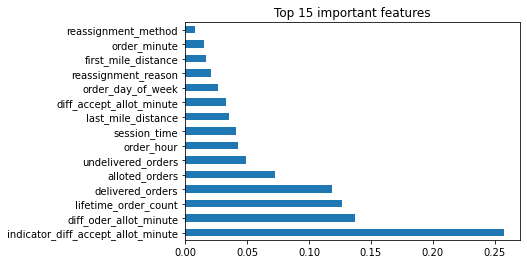

In [126]:
feat_importances = pd.Series(xgbc.feature_importances_, index=test.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

cbc

In [127]:
!pip install catboost==1.0.4

In [128]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

cbc = CatBoostClassifier(n_estimators=115, auto_class_weights= 'Balanced',eval_metric='AUC')

cbc.fit(x_train,y_train,eval_set=(x_test,y_test))

y_test_preds = cbc.predict_proba(x_test)

check_arr_cbc =[]
for i in range(y_test_preds.shape[0]):
    check_arr_cbc.append(y_test_preds[i][1])
    
print(roc_auc_score(y_test, check_arr_cbc))

Learning rate set to 0.347466
0:	test: 0.6849886	best: 0.6849886 (0)	total: 55.4ms	remaining: 6.32s
1:	test: 0.6937516	best: 0.6937516 (1)	total: 117ms	remaining: 6.62s
2:	test: 0.7041729	best: 0.7041729 (2)	total: 168ms	remaining: 6.26s
3:	test: 0.7102590	best: 0.7102590 (3)	total: 229ms	remaining: 6.35s
4:	test: 0.7243565	best: 0.7243565 (4)	total: 292ms	remaining: 6.42s
5:	test: 0.7286914	best: 0.7286914 (5)	total: 345ms	remaining: 6.27s
6:	test: 0.7323329	best: 0.7323329 (6)	total: 399ms	remaining: 6.16s
7:	test: 0.7338082	best: 0.7338082 (7)	total: 465ms	remaining: 6.22s
8:	test: 0.7351300	best: 0.7351300 (8)	total: 558ms	remaining: 6.57s
9:	test: 0.7361939	best: 0.7361939 (9)	total: 698ms	remaining: 7.33s
10:	test: 0.7376119	best: 0.7376119 (10)	total: 795ms	remaining: 7.51s
11:	test: 0.7413590	best: 0.7413590 (11)	total: 869ms	remaining: 7.46s
12:	test: 0.7424401	best: 0.7424401 (12)	total: 929ms	remaining: 7.29s
13:	test: 0.7429366	best: 0.7429366 (13)	total: 984ms	remaining: 7

In [130]:
print(roc_auc_score(y_test, (0.5*(np.array(check_arr_cbc)) + 0.5*(np.array(check_arr_xgbc)))))

0.757270728272568


In [149]:
print(roc_auc_score(y_test, (0.4*(np.array(check_arr_cbc)) + 0.6*(np.array(check_arr_xgbc)))))

0.7572461347716956


In [150]:
print(roc_auc_score(y_test, (0.3*(np.array(check_arr_cbc)) + 0.7*(np.array(check_arr_xgbc)))))

0.7569279267428953


In [151]:
print(roc_auc_score(y_test, (0.2*(np.array(check_arr_cbc)) + 0.8*(np.array(check_arr_xgbc)))))

0.756336089097559


In [152]:
print(roc_auc_score(y_test, (0.1*(np.array(check_arr_cbc)) + 0.9*(np.array(check_arr_xgbc)))))

0.7554294675623352


knn + smote

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline as pp
from imblearn.over_sampling import SMOTE

# knn = KNeighborsClassifier(n_neighbors = 7)
# pipe=pp([('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors =7))])


# oversample = SMOTE()
# X_smote, y_smote = oversample.fit_resample(x_train, y_train)
# pipe.fit(X_smote, y_smote)

# y_test_preds = pipe.predict(x_test)
# print(roc_auc_score(y_test, y_test_preds))

stack

In [136]:
# from sklearn.ensemble import StackingClassifier
# stk = StackingClassifier([('cbc',CatBoostClassifier(n_estimators=25, auto_class_weights= 'Balanced',eval_metric='AUC')),
#                          ('xgb',XGBClassifier(n_estimators=25, scale_pos_weight= 87.8842126062043,eval_metric=['auc']) )])



# stk.fit(x_train,y_train)

# y_test_preds = stk.predict_proba(x_test)

# check_arr =[]
# for i in range(y_test_preds.shape[0]):
#     check_arr.append(y_test_preds[i][1])
    
# print(roc_auc_score(y_test, check_arr))

Bagging

In [137]:
# from sklearn.ensemble import BaggingClassifier
# bag_cbc = BaggingClassifier(base_estimator=  CatBoostClassifier(n_estimators=25, auto_class_weights= 'Balanced',eval_metric='AUC') ,
#                             n_estimators = 10)

# bag_cbc.fit(x_train,y_train)

# y_test_preds = bag_cbc.predict_proba(x_test)

# check_arr =[]
# for i in range(y_test_preds.shape[0]):
#     check_arr.append(y_test_preds[i][1])
    
# print(roc_auc_score(y_test, check_arr))

HIST GB

In [138]:
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingClassifier

# hgbc = HistGradientBoostingClassifier()

# oversample = SMOTE()

# X_smote, y_smote = oversample.fit_resample(x_train, y_train)

# hgbc.fit(X_smote, y_smote)

# y_test_preds = hgbc.predict_proba(x_test)

# check_arr =[]
# for i in range(y_test_preds.shape[0]):
#     check_arr.append(y_test_preds[i][1])
    
# print(roc_auc_score(y_test, check_arr))

LGBM Optuna

In [139]:
# # Import Required Libraries
# import pandas as pd
# import numpy as np
# from sklearn import preprocessing
# from sklearn.metrics import accuracy_score,roc_auc_score
# from xgboost import XGBClassifier,XGBRegressor,plot_importance,XGBRFRegressor

# from scipy.stats import mode,boxcox,skew

# import matplotlib.pyplot as plt
# import optuna
# from sklearn.experimental import enable_iterative_imputer  # noqa
# from sklearn import metrics
# from sklearn.preprocessing import StandardScaler,OneHotEncoder,PowerTransformer
# from sklearn.preprocessing import RobustScaler,MinMaxScaler
# from sklearn.model_selection import StratifiedKFold
# from sklearn.impute import SimpleImputer,KNNImputer,IterativeImputer
# from sklearn.feature_selection import SelectFromModel

# from category_encoders import target_encoder
# import seaborn as sns
# import gc
# import sys,os

# from scipy.spatial import distance
# gc.enable()

# pd.set_option('display.float_format', lambda x: '%.3f' % x)

# import warnings
# warnings.filterwarnings("ignore")

In [140]:
# def objective(trial):
#     # XGBoost parameters
    
#     gc.collect()
    
#     final_valid_predictions = {}
    
#     scores = []
#     auc_score = []
    
#     params = {
#         "objective": "reg:squaredlogerror",
#         "n_estimators": n_estimators,
#         "max_depth": trial.suggest_int("max_depth", 2, 15),
#         "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.5),
#         "colsample_bytree": trial.suggest_loguniform("colsample_bytree", 0.2, 0.9),
#         "subsample": trial.suggest_loguniform("subsample", 0.2, 0.9),
#         "alpha": trial.suggest_loguniform("alpha", 0.01, 100.0),
#         "lambda": trial.suggest_loguniform("lambda", 0.01, 100.0),
#         "gamma": trial.suggest_loguniform("lambda", 0.01, 100.0),
#         "min_child_weight": trial.suggest_loguniform("min_child_weight", 10, 100),
#         "n_jobs": -1,
#         "tree_method": "gpu_hist",
#         "predictor" : "gpu_predictor",
#     }
    
#     cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

#     for fold, (idx_train, idx_valid) in enumerate(cv.split(X,y)):
#         xtrain, ytrain = X.iloc[idx_train], y[idx_train]
#         xvalid, yvalid = X.iloc[idx_valid], y[idx_valid]

#         # Store IDs of validation Dataset
#         valid_ids = xvalid.id.values.tolist()

#         #Save a copy of yvalid
#         true_valid = yvalid

#         n_class = len(np.unique(ytrain))

#         xtrain = feature_transform(xtrain,scaling_option,method)
#         xvalid = feature_transform(xvalid,scaling_option,method)
        
#         xtrain = xtrain.drop('id',axis = 1)
#         xvalid = xvalid.drop('id',axis = 1)
        
        
#         model = XGBRegressor(
#             random_state = random_state,
#             sampling_method = 'gradient_based',
#             use_label_encoder=False,
#             eval_metric = ['auc'],
#             **params
#         )
#         model.fit(xtrain, ytrain,early_stopping_rounds=early_stopping_rounds, eval_set=[(xvalid, yvalid)], verbose=verbose)

#         preds_valid = model.predict(xvalid)
        
#         final_valid_predictions.update(dict(zip(valid_ids, preds_valid)))

#         auc_scr = roc_auc_score(true_valid, preds_valid)

#         auc_score.append(auc_scr)

#         print(f"Fold {fold+1} || AUC : {auc_scr} || Mean AUC : {np.mean(auc_score)}")
    
#     return roc_auc_score(y.to_numpy(), np.array(sorted(final_valid_predictions.items()))[:,1])

In [141]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100)

In [142]:
# hp = study.best_params
# for key, value in hp.items():
#     print(f"{key:>20s} : {value}")
# print(f"{'best objective value':>20s} : {study.best_value}")

### Making Prediction File

In [153]:
sub = 0.5*cbc.predict_proba(test.values) + 0.5*xgbc.predict_proba(test.values)
sub_arr =[]
for i in range(sub.shape[0]):
    sub_arr.append(sub[i][1])


submission_df = pd.DataFrame({'order_id':order_id,'cancelled':sub_arr})
submission_df

,order_id,cancelled
0,130231,0.298151
1,130232,0.366131
2,130233,0.198297
3,130234,0.320033
4,130235,0.178750
...,...,...
144839,41184,0.392957
144840,41185,0.300686
144841,41186,0.399056
144842,41187,0.296233


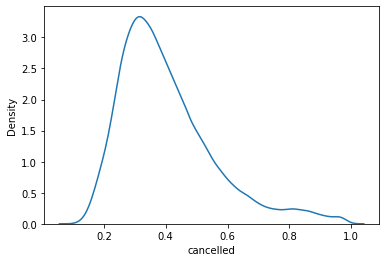

In [154]:
sns.kdeplot(submission_df['cancelled'])

In [155]:
submission_df.to_csv('blend_0.5.csv',index=False)

In [146]:
## Making A Series 

sub_before = pd.read_csv(test_path)
sub_before = sub_before[['order_id']]
sub_before['cancelled'] = 1
sub_before

,order_id,cancelled
0,130231,1
1,130232,1
2,130233,1
3,130234,1
4,130235,1
...,...,...
144839,41184,1
144840,41185,1
144841,41186,1
144842,41187,1


In [147]:
dummy =pd.merge(sub_before, submission_df, on='order_id',how='left')
dummy['cancelled'] = dummy['cancelled_y'].fillna(1)
dummy = dummy.drop(['cancelled_x','cancelled_y'],axis=1)
dummy

,order_id,cancelled
0,130231,0.293192
1,130232,0.344762
2,130233,0.177478
3,130234,0.275049
4,130235,0.182584
...,...,...
144839,41184,0.352737
144840,41185,0.266846
144841,41186,0.384557
144842,41187,0.220064


In [148]:
dummy.to_csv('submission_cbc_125.csv',index=False)